In [70]:
import cmath as math 
import numpy as np
import math as m
import matplotlib.pyplot as plt
import matplotlib.patches as pat

In [71]:
# circle class with center in complex numbers and radius
# - curviture function to help calculations (decarte's theorem, vieta's method)

class circle(object):
    def __init__(self, x, y, r):
        'radius'
        self.r = r
        'center'
        self.c = (x + y*1j)
        
    def curve (self):
        return 1/self.r
    

In [72]:
def decarte(k1, k2, k3, pn = False):
    'takes curviture of 3 circles'
    'default to positive sign'
    
    'returns curviture of tangent circle'
    
    if (not pn):
        return k1 + k2 + k3 + 2 * m.sqrt(k1*k2 + k1*k3 + k2*k3)
    else:
        return k1 + k2 + k3 - 2 * m.sqrt(k1*k2 + k1*k3 + k2*k3)
        

In [73]:
def decarteCenter(c1,c2,c3, pn = False, io = False):
    'find curviture of tangent circle embedded in the middle of 3 tangent circles'
    
    'default pn positive'
    'default io positive'
    
    k1 = c1.curve()
    k2 = c2.curve()
    k3 = c3.curve()
    
    k = decarte(k1,k2,k3,pn)
    
    x = c1.c * k1 + c2.c * k2 + c3.c * k3 
    n = 2* math.sqrt(c1.c * c2.c * k1 * k2 + c1.c * c3.c * k1 * k3 + c2.c * c3.c * k2 * k3)
    
    if (not io):
        return (x + n)/k
    else:
        return (x - n)/k

In [74]:
def findCircle(r, c1, c2):
    'generate circle with radius r tangent to c1 and c2'
    
    'c1 = circle 1'
    'c2 = circle 2'
    
    if c2.c.real > c2.c.real:
        return findCircle(r, c2, c1)
        
    x = (c1.r ** 2 + c1.r * r + c1.r * c2.r - c2.r * r)/(c1.r + c2.r)
    y = math.sqrt((c1.r + r)**2 -  x**2)
    
    c = circle(x, y, r)
    return c

In [75]:
def enclose(c1, c2, c3, out=False):
    'generate outer circle surrounding 3 tangent circles'
    
    k1 = c1.curve()
    k2 = c2.curve()
    k3 = c3.curve()
    
    k = decarte(k1,k2,k3,out)
    radius = 1 / k
    
    center = decarteCenter(c1, c2, c3, out, out)
    
    c = circle(center.real, center.imag, radius)
    
    return c

In [76]:
def vieta(outer, c1, c2, c3, out=False):
    'precondition'
    '{outer, c1, c2} tangent'
    '{c3, c1, c2} tangent'
    
    'generate circle tangent to outer, c1 and c3 opposite to c3'
    
    k0 = outer.curve()
    k1 = c1.curve()
    k2 = c2.curve()
    k3 = c3.curve()
    
    k = 2*( k1 + k2 + k0 ) - k3
    radius = 1 / k
    
    center = (2*( k0*outer.c + k1*c1.c + k2*c2.c )- k3*c3.c)/k
    
    c = circle(center.real, center.imag, radius)
    
    return c

In [77]:
def encloseTangent(r1, r2, r3):
    'precondition:'
    'tangent circle have same curviture'
    
    'generate curviture of tangent circle embedded in the middle of 3 tangent circles'
    
    c1 = circle(0, 0, r1)
    c2 = circle(r1 + r2, 0 ,r2)
    c3 = findCircle(r3, c1, c2)
    
    en = enclose(c1, c2 ,c3, True)
    
    return (c1, c2, c3, en)
    

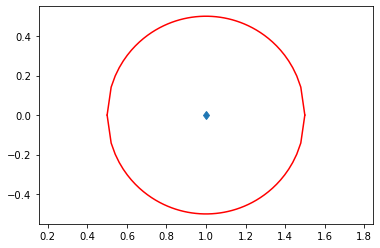

In [78]:
cir = circle(1,0,.5)
c1 = circle(0,0,.5)
c2 = findCircle(0.5, cir, c1)

x = cir.c.real
y = cir.c.imag

x_ = np.linspace(cir.c.real - cir.r, cir.c.real + cir.r)
y_ = [ m.sqrt(cir.r**2 - (x__ - x)**2) + y for x__ in x_ ]

y__ = [ -m.sqrt(cir.r**2 - (x__ - x)**2) + y for x__ in x_ ]

plt.axis('equal')
plt.plot(x,y, 'd')
plt.plot(x_,y_,'r')
plt.plot(x_,y__,'r')

(-0.6850852961085888,
 1.6850852961085887,
 -0.8964101615137757,
 1.4737604307034018)

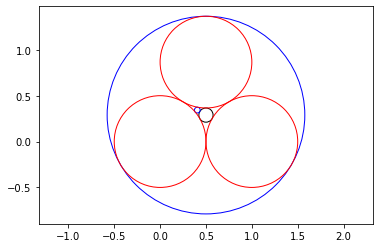

In [79]:
# testing enclose

fig, ax = plt.subplots()

en = enclose(cir, c1,c2, True)
p = pat.Circle((en.c.real,en.c.imag), en.r, edgecolor='blue', facecolor='none')
ax.add_patch(p)

en_ = enclose(cir, c1,c2)
p = pat.Circle((en_.c.real,en_.c.imag), en_.r, edgecolor='black', facecolor='none')
ax.add_patch(p)

c__ = enclose(c1,c2,en_)
p = pat.Circle((c__.c.real, c__.c.imag), c__.r, edgecolor='blue', facecolor='none')
ax.add_patch(p)

p = pat.Circle((x,y), cir.r, edgecolor='red', facecolor='none')
ax.add_patch(p)
p = pat.Circle((c1.c.real,c1.c.imag), cir.r, edgecolor='red', facecolor='none')
ax.add_patch(p)
p = pat.Circle((c2.c.real,c2.c.imag), cir.r, edgecolor='red', facecolor='none')
ax.add_patch(p)

plt.axis('equal')

(-0.6850852961085888,
 1.6850852961085887,
 -0.8964101615137757,
 1.4737604307034018)

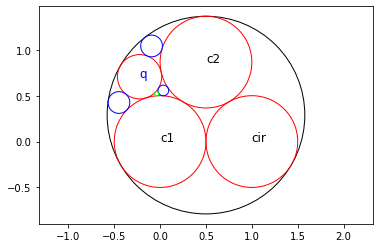

In [80]:
# testing vieta

x, fig = plt.subplots()

en = enclose(cir, c1,c2, True)

q = vieta(en, c1, c2, cir)

q_ = vieta(en, c1, q, c2)
q_1 = vieta(en, c2, q, c1)

# but not q2 it's messy
q_2 = vieta(en, c1, cir, q)

fn = lambda x:  pat.Circle((x.c.real,x.c.imag), x.r, edgecolor='red', facecolor='none')

p = pat.Circle((en.c.real,en.c.imag), en.r, edgecolor='black', facecolor='none')
fig.add_patch(p)

p = fn(c1)
fig.add_patch(p)

p = fn(c2)
fig.add_patch(p)

p = fn(q)
fig.add_patch(p)

p = fn(cir)
fig.add_patch(p)

p = fn(q_)
p.set_ec( 'blue' )
fig.add_patch(p)

p = fn(q_1)
p.set_ec( 'blue' )
fig.add_patch(p)

e = enclose(q, c1, c2)
p = fn(e)
p.set_ec( 'blue' )
fig.add_patch(p)

e1 = vieta(q, c1, e, c2)
p = fn(e1)
p.set_ec( 'lime' )
fig.add_patch(p)

plt.text(c1.c.real, c1.c.imag, 'c1', fontsize=12)
plt.text(c2.c.real, c2.c.imag, 'c2', fontsize=12)
plt.text(cir.c.real, cir.c.imag, 'cir', fontsize=12)

plt.text(q.c.real, q.c.imag, 'q', fontsize=12, color = 'blue')

plt.axis('equal')

In [199]:
# make apollonian gasket
# and network

class apollonianGasket(object):

    def __init__(self, r1, r2, r3):
        
        'generate inner circles with radius r1, r2, r3'
        'and outer circle tangent and encloses r1, r2, r3'
        
        en = encloseTangent(r1, r2, r3)
        self.out  = en[3]
        self.inner = [en[0], en[1], en[2]]
        
    def buildNetwork(self, maxDepth):
        'build network from main inner circles'
        x = []
        y = []
        
        for n in range(3):
            x.append( self.inner[n].c.real )
            y.append( self.inner[n].c.imag )
        
        x.append(x[0])
        y.append(y[0])
        
        plt.plot(x, y, 'b-')
        plt.axis('equal')
        
        self.buildCenter(ap.inner[:3], 1, maxDepth, True)
        
    def buildCenter(self, circles, depth, maxDepth, triangulate = False):
        if (depth < maxDepth):
            
            (c1, c2, c3) = circles

            center = enclose(c1, c2, c3)
            self.inner.append( center )
            
            if (triangulate):
                for i in range(3):
                    plt.plot([center.c.real, circles[i].c.real], [center.c.imag, circles[i].c.imag], 'b-')

                plt.axis('equal')

            self.buildCenter( ( c1, c3, center ), depth+1, maxDepth, triangulate )
            self.buildCenter( ( c1, c2, center ), depth+1, maxDepth, triangulate )
            self.buildCenter( ( c3, c2, center ), depth+1, maxDepth, triangulate )
        
    def buildOuter(self, en, circles, depth, maxDepth):
        if (depth < maxDepth):
            # outer circles
            (c1, c2, c3) = circles
            
            q1 = vieta(en, c2, c3, c1)
            self.inner.append( q1 )
            
            q2 = vieta(en, c1, c3, c2)
            self.inner.append( q2 )
            
            q3 = vieta(en, c1, c2, c3)
            self.inner.append( q3 )
            
            itt = (q1, q2, q3)
        
            self.buildOuter(en, (c1, c3, q2), depth+1, maxDepth)
            self.buildOuter(en, (c1, c2, q3), depth+1, maxDepth)
            self.buildOuter(en, (c2, c3, q1), depth+1, maxDepth)
           
            self.buildSide(en, (c1, c3, q2), depth+1, maxDepth)            
            self.buildSide(en, (c1, c2, q3), depth+1, maxDepth)            
            self.buildSide(en, (c2, c3, q1), depth+1, maxDepth)
            
    def buildSide(self, en, circles, depth, maxDepth):
        if (depth < maxDepth):
            (c1, c2, c3) = circles
            
            q1 = vieta(c1, c2, c3, en)
            self.inner.append( q1 )
            
            self.buildSide(c3, (c2, q1, c1), depth+1, maxDepth)            
            self.buildSide(c2, (c1, q1, c3), depth+1, maxDepth)            
            self.buildSide(c1, (c2, q1, c3), depth+1, maxDepth)
            
            
    def build(self, maxDepth, triangulate = False):
        self.buildCenter(ap.inner[:3], 1, maxDepth, triangulate)
        self.buildOuter(ap.out, ap.inner[:3], 1, maxDepth)

(-1.3701705922171776,
 3.3701705922171774,
 -1.7928203230275515,
 2.9475208614068036)

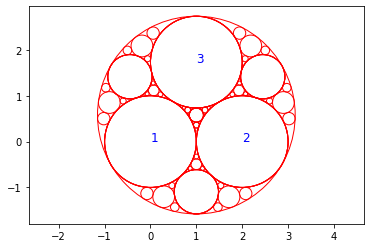

In [200]:
# apollonian gasket

ap = apollonianGasket(1,1,1)
ap.build(4)
x, fig = plt.subplots()

for n in ap.inner:
    p = fn(n)
    fig.add_patch(p)
    
p = fn(ap.out)
fig.add_patch(p)

for n in range(3):
    q = ap.inner[n]
    plt.text(q.c.real, q.c.imag, str(n + 1) , fontsize=12, color = 'blue')

plt.axis('equal')

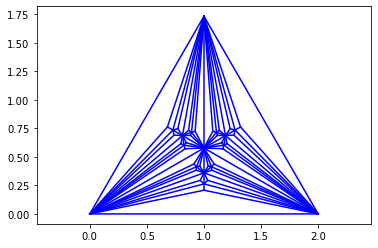

In [201]:
# apollonian network

ap = apollonianGasket(1,1,1)
ap.buildNetwork(5)

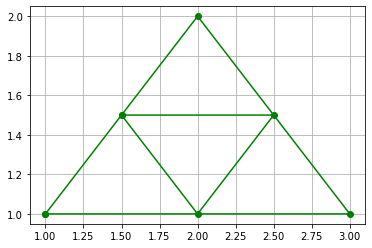

In [196]:
# sierpinski's triangle

x = [1, 2, 3, 1]
y = [1, 2, 1, 1]

x_mid = []
y_mid = []

# find midpoint

for i in range( len(x) - 1 ):
    x_mid.append((x[i] + x[i + 1]) / 2 )
    y_mid.append((y[i] + y[i + 1]) / 2 )
    
x_mid.append(x_mid[0])
y_mid.append(y_mid[0])

plt.grid(True)
plt.plot(x, y, 'go-')
plt.plot(x_mid, y_mid, 'go-') 

In [197]:
def siepTrig(x, y, itt):
    'takes array of length 3 x and y values'
    if itt > 0:

        x.append(x[0])
        y.append(y[0])

        x_mid = []
        y_mid = []

        for i in range( len(x) - 1 ):
            x_mid.append((x[i] + x[i + 1]) / 2 )
            y_mid.append((y[i] + y[i + 1]) / 2 )

        x_mid.append(x_mid[0])
        y_mid.append(y_mid[0])

        plt.plot(x, y, 'go-')
        plt.plot(x_mid, y_mid, 'go-') 
        
        
        siepTrig( [ x[0], x_mid[0], x_mid[2]], [y[0], y_mid[0], y_mid[2]], itt - 1)
        
        siepTrig( [ x[1], x_mid[0], x_mid[1]], [y[1], y_mid[0], y_mid[1]], itt - 1)
        
        siepTrig( [ x_mid[2], x_mid[1], x[2]], [ y_mid[2], y_mid[1], y[2]], itt - 1)


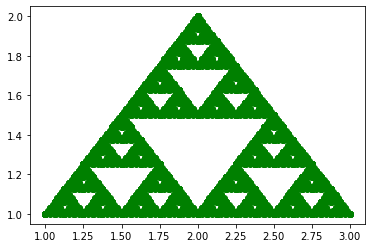

In [198]:
siepTrig([1,2,3],[1,2,1], 6)